In [30]:
# Basic libraries
import pandas as pd
import numpy as np

# For visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
# Load dataset
data = pd.read_csv('music.csv')

# View first few rows
data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [6]:
#view all data
data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [8]:
# Basic info
data.info()

# Check for missing values
data.isnull().sum()

# Drop or fill missing values
data = data.dropna() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 564.0+ bytes


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#scale the values
scaler = StandardScaler()
data[['age']] = scaler.fit_transform(data[['age']])

#encoding
encoder = LabelEncoder()
data['genre'] = encoder.fit_transform(data['genre'])

data

,age,gender,genre
0,-1.594311,1,3
1,-0.992263,1,3
2,-0.590898,1,3
3,-0.390216,1,4
4,0.211832,1,4
5,0.412514,1,4
6,0.613196,1,1
7,1.014561,1,1
8,1.817291,1,1
9,-1.594311,0,2


In [15]:
encoder.classes_

array([0, 1, 2, 3, 4])

In [16]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('genre', axis=1)
y = data['genre']

# Split into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the split sizes
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (14, 2)
Validation set: (2, 2)
Test set: (2, 2)


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_val)
y_pred

array([3, 1])

In [27]:
#evaluating
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 1.0


In [29]:
#Business Analysis
# Feature importance analysis
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

  Feature  Importance
0     age    0.631081
1  gender    0.368919


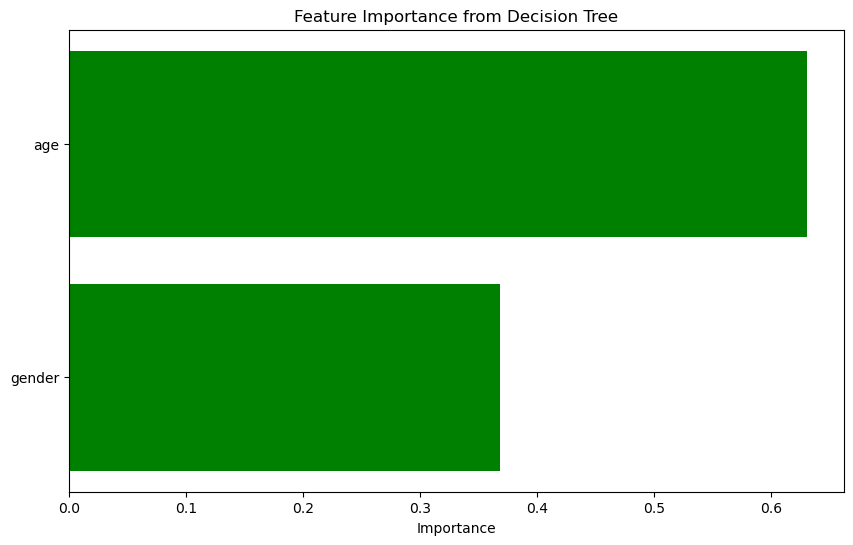

In [32]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='Green')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis() 
plt.show()